> Mamy dane $n$ punktów $(x, y)$ wewnątrz koła (z brzegiem) o promieniu $k$ (liczba naturalna), tzn. $ 0 \le x^2 + y ^2 \le k $, które są w nim równomiernie rozłożone, tzn. prawdopodobieństwo znalezienia punktu na danym obszarze jest proporcjonalne do pola tego obszaru.

> Napisz algorytm, który w czasie $O(n)$ posortuje punkty po ich odległości od punktu $(0, 0)$, tzn. $d = sqrt(x^2 + y^2)$.

### Wyjaśnienie działania algorytmu

Ponieważ mamy informację, że rozkład punktów jest równomierny, jest to jawna sugestia, by skorzystać z algorytmu sortowania Bucket Sort. Ponieważ Bucket Sort (przynajmniej w podstawowej wersji, w której nie wywołuje sortowania Bucket Sortem ponownie na dużych wiaderkach) wymaga tego, aby wszystkie wiaderka zawierały zbliżoną liczbę elementów, musimy obszar, na którym znajdują się punkty, podzielić na podobszary o równych polach powierzchni. Najłatwiej tego dokonać, uzależniając pole obszaru od promienia, a więc poprzez podział okręgu na pierścienie o równych polach oraz 1 koło (obszar, który zawiera środek układu współrzędnych).

###### Otrzymujemy kolejno:
- Pole najmniejszego obszaru (koła): $ π r_1^2 $,
- Pole pierwszego pierścienia:       $ π r_2^2 - π r_1^2 = π r_1 ^ 2 \Longleftrightarrow r_2 = \sqrt2 r_1 $,
- Pole drugiego pierścienia:         $ π r_3^2 - π r_2^2 = π r_1^2 \Longleftrightarrow π r_3^2 = 2π r_1^2 + π r_1^2 = 3π r_1^2 \Longleftrightarrow r_3 = \sqrt3 r_1 $
- ...,
- Pole n-1. pierścienia (będącego n. obszarem): 

$ π r_n^2 - π r_(n-1)^2 = π r_1^2 $

$ π r_n^2 = π r_1^2 + π r_(n-1)^2 = π(r_1^2 + r_(n-2)^2 + r_(n-3)^2) = ... = π(r_1^2 + r_1^2 + ... + r_1^2) = \sqrt n r_1 $

Zatem, jeżeli w ogólności przyjmiemy, że liczba tworzonych kubełków wyniesie $ \frac{1}{m} $ liczby wszystkich punktów do posortowania (czyli $ \frac{n}{m} $ kubełków, ponieważ $ n $ to liczba punktów do posortowania, natomiast $ m $ jest pewną stałą wartością, mniejszą od $ n $. Im mniejsza wartość $ m $, tym więcej kubełków otrzymamy), wówczas łatwo wyznaczymy promień pierwszego obszaru (koła) $ r_1 $ z równości: $ \frac{πk^2}{\frac{n}{m}} = π r_1^2 \Leftrightarrow k^2 \cdot \frac{m}{n} = r_1^2 \Leftrightarrow r_1 = \sqrt{\frac{m}{n}} \cdot k $

Promienie kolejnych obszarów wyznaczymy, korzystając z podobieństwa. Wystarczy zauważyć, że $ (\frac{r_2}{r_1})^2 = 2 $, bo pole powierzchni okręgu o promieniu $ r_2 $ jest 2 razy większe niż pole pierwszego okręgu, bo musi być powiększone o wartośc jego pola (tzn. $ π r_2^2 = π r_1^2 + π r_1^2 = 2 \cdot π r_1^2 $). Analogicznie dla kolejnych okręgów, których pola powierzchni są odpowiednią skalą pola pierwszego okręgu. W ogólności $ (\frac{r_n}{r_1})^2 = n $.

Na podstawie powyższych obserwacji, w łatwy sposób wyznaczymy funkcję, która będzie przyporządkowywała punkty do odpowiednich wiaderek. Dla każdego punktu będzie trzeba policzyć kwadrat promienia (ogległości od środka układu współrzędnych) i podzielić go, przy pomocy dzielenia całkowitoliczbowego, przez kwadrat promienia pierwszego okręgu ($ r_1^2 $). Otrzymamy w ten sposób indeks tablicy (wiaderka), w jakiej należy umieścić dany punkt. Najlepiej zapisać go wraz z wartością kwadratu promienia, aby nie trzeba było go za każdym razem na nowo liczyć (przyda się przy sortowaniu wiaderek). Podsumowując, indeks wiaderka otrzymujemy obliczając: $ \left \lfloor{\frac{x^2 + y^2}{r_1^2}}\right \rfloor  $.

##### Zrzuty ekranu z zajęć

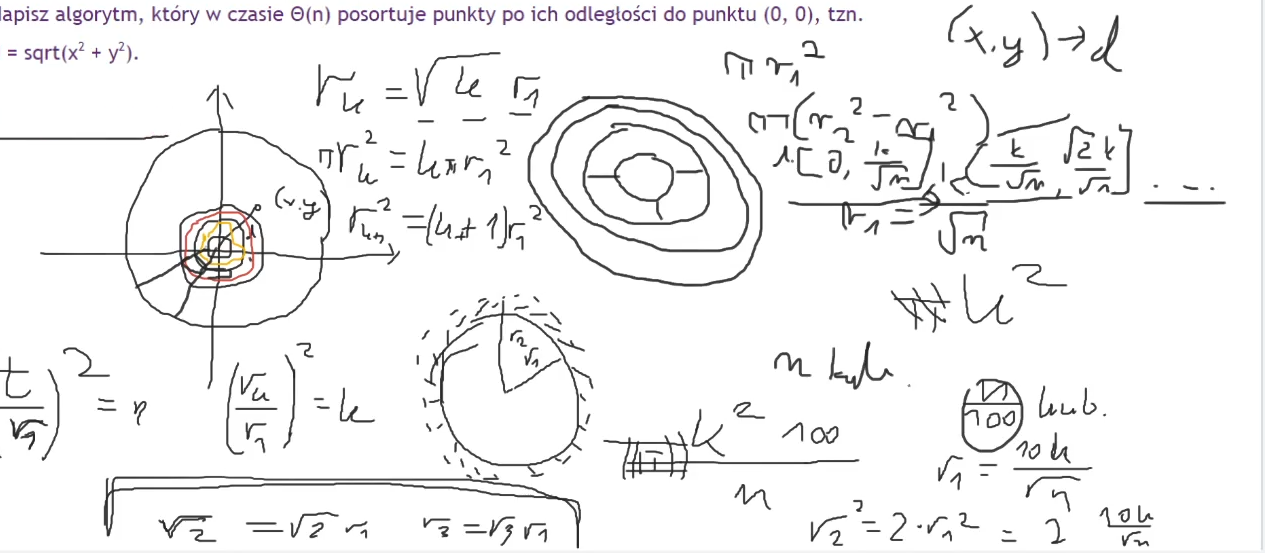
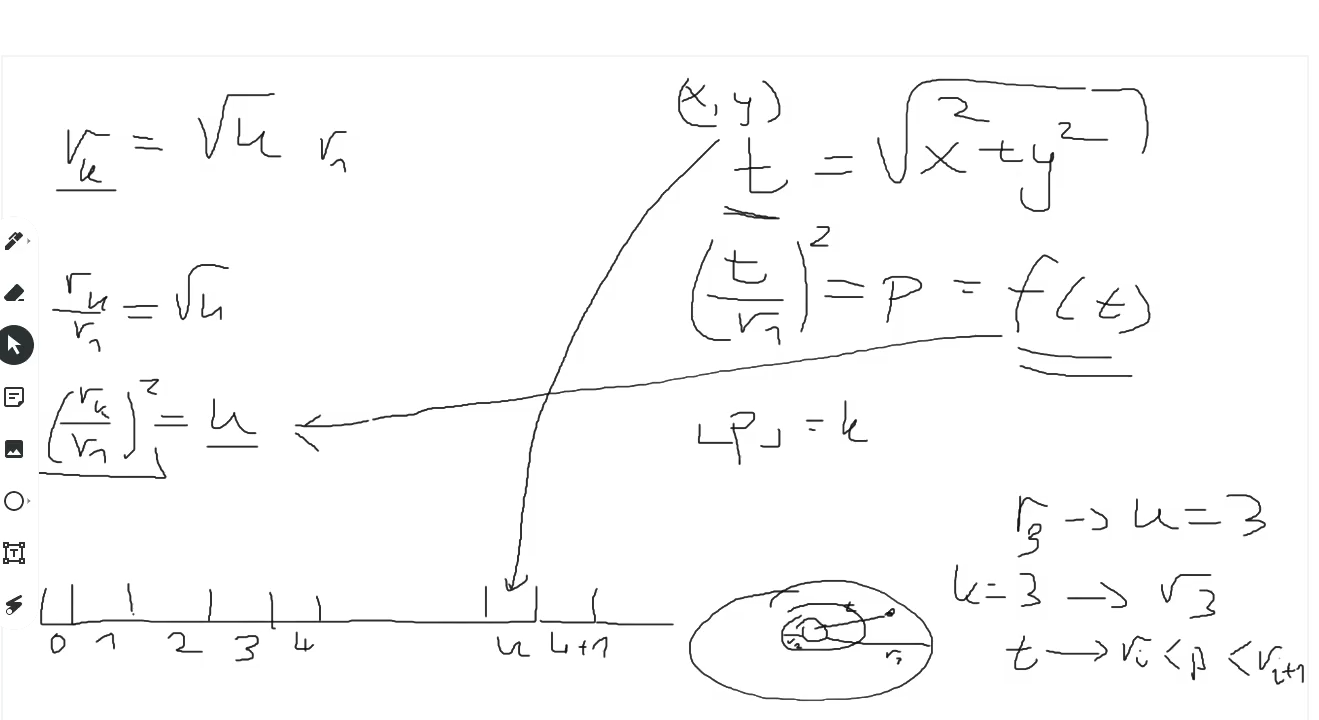

### Implementacja algorytmu

W poniższej implementacji korzystamy z $ \frac{n}{16} $ wiaderek (przyjmujemy $ m = 16 $).

In [1]:
def bucket_sort(points, k):
    # As we will sort points by their distance later, calculate and store
    # a square of a distance (we don't have to calculate a sqrt of this value)
    for i in range(len(points)):
        points[i] = (points[i], points[i][0] ** 2 + points[i][1] ** 2)
    
    if len(points) <= 24:
        insertion_sort(points)
        # Remove radius square stored
        for i in range(len(points)):
            points[i] = points[i][0]
    else:
        # Create buckets
        m = 16
        r1_sq = (m / len(points)) * k ** 2
        buckets_count = len(points) // m + 1
        buckets = [[] for _ in range(buckets_count)]
        # Distribute values to the proper buckets
        for point in points:
            # Calculate the bucket's index depending on the current
            # point's distance from the center
            bucket_idx = int(point[1] / r1_sq)
            buckets[bucket_idx].append(point)
        # Sort each bucket separately
        for bucket in buckets:
            insertion_sort(bucket)
        # Rewrite sorted values from buckets to the inintial array
        i = 0
        for bucket in buckets:
            print('bucket', len(bucket)) # Remove me
            for point in bucket:
                points[i] = point[0]
                i += 1


def insertion_sort(points):
    for i in range(1, len(points)):
        j = i-1
        temp = points[i]
        
        while j >= 0 and temp[1] < points[j][1]:
            points[j+1] = points[j]
            j -= 1
        
        points[j+1] = temp        

###### Kilka testów

In [2]:
import random

sgn = lambda: (-1) ** random.randint(0, 1)
rand_coord = lambda max_val: sgn() * random.random() * max_val

def rand_pt(max_r):
    x = rand_coord(max_r)
    max_y = (max_r ** 2 - x ** 2) ** .5
    while True:
        y = rand_coord(max_y)
        if y <= max_y:
            return round(x, 2), round(y, 2)
    
k = 10
pts = [rand_pt(k) for _ in range(200)]
print(pts, end='\n\n')
bucket_sort(pts, k)
print(pts)

[(0.94, -5.97), (-0.19, 1.32), (4.41, 2.87), (-4.85, -4.73), (9.12, -2.87), (7.32, 2.47), (4.61, 8.28), (-8.34, 0.09), (7.69, 6.11), (-3.64, -9.23), (3.82, 0.52), (-5.47, 7.64), (2.49, -2.97), (-4.44, -2.37), (-2.01, 3.25), (6.51, -2.24), (-4.74, -6.72), (-3.78, 4.76), (-9.79, 1.26), (9.06, 0.98), (2.88, -1.36), (-9.41, -3.11), (-9.64, 0.34), (-2.44, 2.61), (1.61, 2.49), (-4.2, -5.41), (2.03, -4.26), (-3.35, 1.64), (3.02, 5.37), (9.79, 1.18), (0.78, -4.24), (8.32, -2.31), (-9.08, -0.56), (2.01, -0.28), (6.29, 0.55), (-5.22, -5.44), (1.31, 8.39), (1.07, 8.35), (-7.08, 0.7), (-7.56, -3.34), (0.31, 5.62), (0.45, 9.87), (-2.12, 3.4), (3.07, 3.75), (-1.39, -3.6), (8.76, -0.29), (9.08, 0.46), (-1.09, -3.53), (-3.31, -6.17), (5.26, 4.37), (-0.29, 2.73), (0.61, -2.6), (0.31, -2.64), (-9.99, -0.22), (-0.27, -9.23), (0.88, -0.86), (-3.68, -0.2), (-3.08, -8.94), (-4.49, -7.2), (-3.76, -6.81), (-7.07, 2.75), (5.89, 5.18), (-1.06, 3.06), (-6.14, 1.91), (-1.32, -1.96), (8.3, 5.28), (-4.25, 5.78), (-